#  Death Profile in Alameda County (2014-2021)
Dataset if from the California Department of Public Health, Center for Health Statistics and Informatics, Vital Statistics Branch. 

https://data.chhs.ca.gov/dataset/death-profiles-by-county

This dataset contains counts of deaths for California counties based on information entered on death certificates. Final counts are derived from static data and include out-of-state deaths to California residents, whereas provisional counts are derived from incomplete and dynamic data. Provisional counts are based on the records available when the data was retrieved and may not represent all deaths that occurred during the time period. Deaths involving injuries from external or environmental forces, such as accidents, homicide and suicide, often require additional investigation that tends to delay certification of the cause and manner of death. This can result in significant under-reporting of these deaths in provisional data.

The final data tables include both deaths that occurred in each California county regardless of the place of residence (by occurrence) and deaths to residents of each California county (by residence), whereas the provisional data table only includes deaths that occurred in each county regardless of the place of residence (by occurrence). The data are reported as totals, as well as stratified by age, gender, race-ethnicity, and death place type. Deaths due to all causes (ALL) and selected underlying cause of death categories are provided.

The goal of this notebook is to explore and answer some questions we may have about the data. This notebook will specifically look at Alameda County in which I am from.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('death_profile.csv')

In [3]:
df.head()

,Year,County,Geography_Type,Strata,Strata_Name,Cause,Cause_Desc,ICD_Revision,Count,Annotation_Code,Annotation_Desc,Data_Revision_Date
0,2014,Alameda,Occurrence,Total Population,Total Population,ALL,All causes (total),ICD-10,9357.0,NaN,NaN,12/15/2022
1,2014,Alameda,Occurrence,Age,Under 1 year,ALL,All causes (total),ICD-10,105.0,NaN,NaN,12/15/2022
2,2014,Alameda,Occurrence,Age,1-4 years,ALL,All causes (total),ICD-10,17.0,NaN,NaN,12/15/2022
3,2014,Alameda,Occurrence,Age,5-14 years,ALL,All causes (total),ICD-10,17.0,NaN,NaN,12/15/2022
4,2014,Alameda,Occurrence,Age,15-24 years,ALL,All causes (total),ICD-10,133.0,NaN,NaN,12/15/2022


In [4]:
df = df[df['County'] == 'Alameda']

In [5]:
df.tail()

,Year,County,Geography_Type,Strata,Strata_Name,Cause,Cause_Desc,ICD_Revision,Count,Annotation_Code,Annotation_Desc,Data_Revision_Date
159402,2021,Alameda,Residence,Race-Ethnicity,Hawaiian/Pacific Islander,SUI,Intentional self-harm (suicide),ICD-10,NaN,1.0,Cell suppressed for small numbers,12/15/2022
159403,2021,Alameda,Residence,Race-Ethnicity,Hispanic,SUI,Intentional self-harm (suicide),ICD-10,22.0,NaN,NaN,12/15/2022
159404,2021,Alameda,Residence,Race-Ethnicity,Multi-Race,SUI,Intentional self-harm (suicide),ICD-10,NaN,1.0,Cell suppressed for small numbers,12/15/2022
159405,2021,Alameda,Residence,Race-Ethnicity,White,SUI,Intentional self-harm (suicide),ICD-10,74.0,NaN,NaN,12/15/2022
159406,2021,Alameda,Residence,Race-Ethnicity,Other/Unknown,SUI,Intentional self-harm (suicide),ICD-10,NaN,1.0,Cell suppressed for small numbers,12/15/2022


In [6]:
df.Strata.unique()

array(['Total Population', 'Age', 'Gender', 'Place Type',
       'Race-Ethnicity'], dtype=object)

In [7]:
df.Cause_Desc.unique()

array(['All causes (total)', "Alzheimer's disease", 'Malignant neoplasms',
       'Chronic lower respiratory diseases', 'Diabetes mellitus',
       'Assault (homicide)', 'Diseases of heart',
       'Essential hypertension and hypertensive renal disease',
       'Accidents (unintentional injuries)',
       'Chronic liver disease and cirrhosis',
       'Nephritis, nephrotic syndrome and nephrosis',
       "Parkinson's disease", 'Influenza and pneumonia',
       'Cerebrovascular diseases', 'Intentional self-harm (suicide)'],
      dtype=object)

In [8]:
df.isnull().sum()

Year                     0
County                   0
Geography_Type           0
Strata                   0
Strata_Name              0
Cause                    0
Cause_Desc               0
ICD_Revision             0
Count                  690
Annotation_Code       2252
Annotation_Desc       2252
Data_Revision_Date       0
dtype: int64

In [9]:
df[df['Count'].isnull()].head()

,Year,County,Geography_Type,Strata,Strata_Name,Cause,Cause_Desc,ICD_Revision,Count,Annotation_Code,Annotation_Desc,Data_Revision_Date
31,2014,Alameda,Occurrence,Race-Ethnicity,American Indian/Alaska Native,ALZ,Alzheimer's disease,ICD-10,NaN,1.0,Cell suppressed for small numbers,12/15/2022
34,2014,Alameda,Occurrence,Race-Ethnicity,Hawaiian/Pacific Islander,ALZ,Alzheimer's disease,ICD-10,NaN,1.0,Cell suppressed for small numbers,12/15/2022
36,2014,Alameda,Occurrence,Race-Ethnicity,Multi-Race,ALZ,Alzheimer's disease,ICD-10,NaN,1.0,Cell suppressed for small numbers,12/15/2022
38,2014,Alameda,Occurrence,Race-Ethnicity,Other/Unknown,ALZ,Alzheimer's disease,ICD-10,NaN,1.0,Cell suppressed for small numbers,12/15/2022
42,2014,Alameda,Occurrence,Race-Ethnicity,American Indian/Alaska Native,CAN,Malignant neoplasms,ICD-10,NaN,1.0,Cell suppressed for small numbers,12/15/2022


In [10]:
df[df['Count'].isnull()].Annotation_Desc.unique()

array(['Cell suppressed for small numbers',
       'Cell suppressed for complementary cell'], dtype=object)

## Death Demographic

In [11]:
import matplotlib.pyplot as plt

In [12]:
def column_count(col):
    frame = df[df['Strata'] == col]
    frame_count = pd.DataFrame()
    frame_count[col] = frame['Strata_Name'].unique()
    
    i=0
    for x in frame_count[col]:
        frame_count.at[i, 'Count'] = frame[frame['Strata_Name'] == x]['Count'].sum()
        i+=1
    
    return frame_count

In [13]:
age_count = column_count('Age')
age_count

,Age,Count
0,Under 1 year,1183.0
1,1-4 years,102.0
2,5-14 years,137.0
3,15-24 years,1930.0
4,25-34 years,3383.0
5,35-44 years,4656.0
6,45-54 years,9483.0
7,55-64 years,20848.0
8,65-74 years,29387.0
9,75-84 years,36293.0


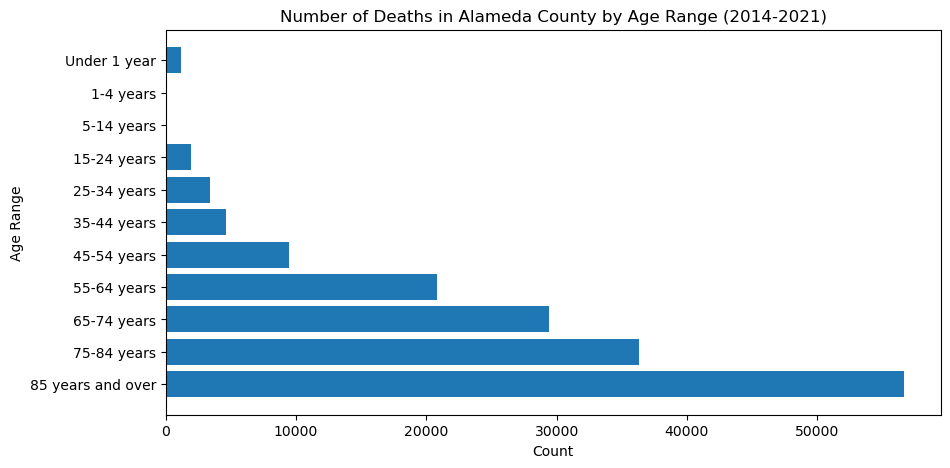

In [14]:
fig = plt.figure(figsize =(10, 5))
plt.barh(age_count['Age'], age_count['Count'])
plt.ylabel('Age Range')
plt.xlabel('Count')
plt.title('Number of Deaths in Alameda County by Age Range (2014-2021)')
plt.gca().invert_yaxis()
plt.show()

In [15]:
gender_count = column_count('Gender')
gender_count

,Gender,Count
0,Female,142287.0
1,Male,149388.0
2,Nonbinary/Unknown,0.0


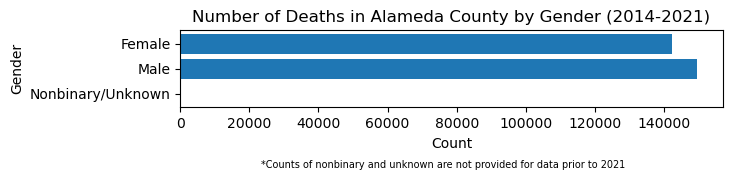

In [16]:
fig = plt.figure(figsize =(7, 1))
plt.barh(gender_count['Gender'], gender_count['Count'])
plt.ylabel('Gender')
plt.xlabel('Count')
plt.title('Number of Deaths in Alameda County by Gender (2014-2021)')
plt.gca().invert_yaxis()
txt="*Counts of nonbinary and unknown are not provided for data prior to 2021"
plt.figtext(0.5, -0.5, txt, wrap=True, horizontalalignment='center', fontsize=7)
plt.show()

In [17]:
race_count = column_count('Race-Ethnicity')
race_count

,Race-Ethnicity,Count
0,American Indian/Alaska Native,477.0
1,Asian,54963.0
2,Black,54886.0
3,Hawaiian/Pacific Islander,1945.0
4,Hispanic,34268.0
5,Multi-Race,2805.0
6,White,138654.0
7,Other/Unknown,1360.0


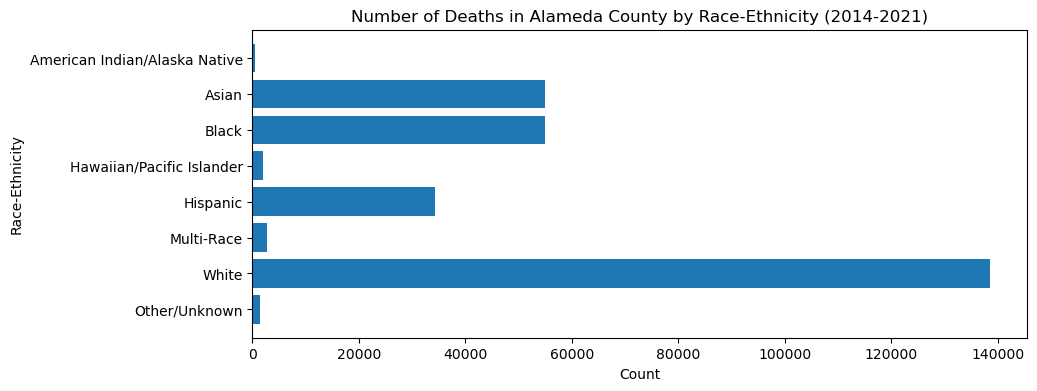

In [18]:
fig = plt.figure(figsize =(10, 4))
plt.barh(race_count['Race-Ethnicity'], race_count['Count'])
plt.ylabel('Race-Ethnicity')
plt.xlabel('Count')
plt.title("Number of Deaths in Alameda County by Race-Ethnicity (2014-2021)")
plt.gca().invert_yaxis()
plt.show()

## Cause of Death

The cause of death categories are based solely on the underlying cause of death as coded by the International Classification of Diseases.

    ALL = All causes (total)
    ALZ = Alzheimer's disease
    CAN = Malignant neoplasms (cancers)
    CLD = Chronic lower respiratory disease (CLRD)
    DIA = Diabetes mellitus
    HOM = Assault (homicide)
    HTD = Diseases of heart 
    HYP = Essential hypertension and hypertensive renal disease
    INJ = Accidents (unintentional injuries)
    LIV = Chronic liver disease and cirrhosis
    NEP = Nephritis, nephrotic syndrome and nephrosis
    PAR = Parkinson's disease
    PNF = Pneumonia and influenza
    STK = Cerebrovascular disease (stroke)
    SUI = Intentional self-harm (suicide)

In [19]:
cod = pd.DataFrame()
cod['Year'] = df['Year'].unique()
for x in df.Cause.unique():
    cause = df[df['Cause'] == x]
    i = 0
    for y in cod['Year']:
        cod.at[i, x] = cause[cause['Year'] == y]['Count'].sum()
        i += 1

In [20]:
cod = cod.drop(['ALL'], axis=1)
cod = cod.set_index('Year')

In [21]:
cod

,ALZ,CAN,CLD,DIA,HOM,HTD,HYP,INJ,LIV,NEP,PAR,PNF,STK,SUI
Year,,,,,,,,,,,,,,
2014,2840.0,13549.0,2457.0,2159.0,614.0,11234.0,1201.0,2407.0,878.0,708.0,522.0,1319.0,3178.0,944.0
2015,3329.0,13575.0,2797.0,1979.0,729.0,11737.0,1228.0,2680.0,865.0,657.0,636.0,1297.0,3926.0,854.0
2016,3424.0,13955.0,2476.0,1947.0,728.0,11923.0,1291.0,2463.0,913.0,754.0,676.0,1186.0,3882.0,919.0
2017,3734.0,13444.0,2536.0,2171.0,358.0,11748.0,1568.0,2434.0,951.0,888.0,764.0,1423.0,4810.0,823.0
2018,3823.0,13666.0,2453.0,1946.0,502.0,12072.0,1470.0,2653.0,966.0,959.0,765.0,1502.0,4046.0,989.0
2019,3673.0,13418.0,2385.0,2071.0,353.0,12324.0,1512.0,3107.0,1021.0,875.0,809.0,1289.0,4463.0,924.0
2020,3875.0,13360.0,2390.0,2298.0,729.0,12749.0,1589.0,3711.0,1245.0,968.0,845.0,1182.0,4526.0,801.0
2021,3030.0,13708.0,2149.0,2202.0,898.0,12534.0,1620.0,3813.0,1211.0,1022.0,770.0,841.0,4785.0,925.0


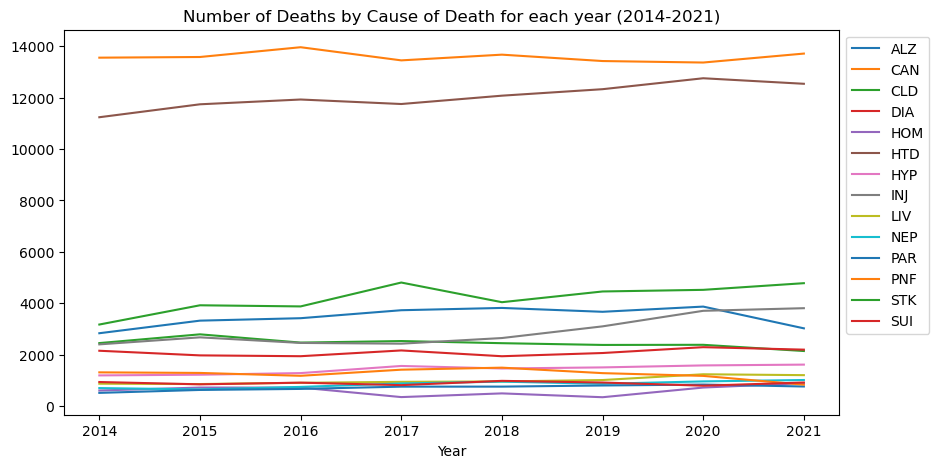

In [22]:
cod.plot.line(figsize=(10,5))
plt.title("Number of Deaths by Cause of Death for each year (2014-2021)")
plt.legend(bbox_to_anchor=(1.0, 1.0))

### Lowest and Leading Cause of Death

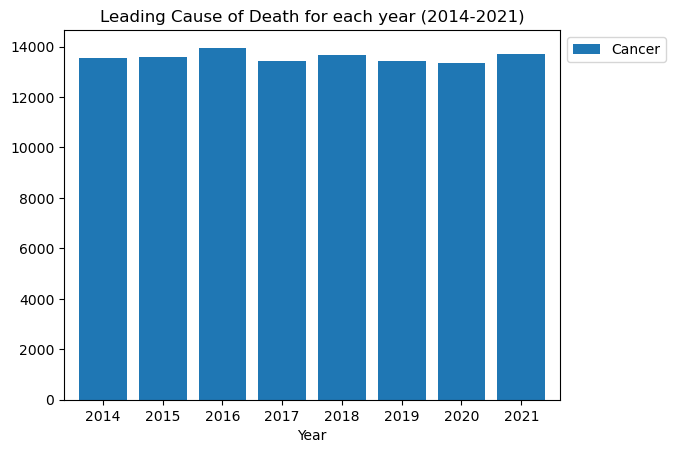

In [23]:
leading = cod.max(axis=1).to_frame()
leading.plot.bar(rot=0, width=0.8)
plt.legend(['Cancer'], bbox_to_anchor=(1.0, 1.0))
plt.title('Leading Cause of Death for each year (2014-2021)')
plt.show()

In [24]:
lowest = cod.min(axis=1).to_frame()
i = 2014
for x in lowest[0]:
    lowest.at[i, 'Cause'] = cod.columns[np.where(cod == x)[1][0]]
    i += 1

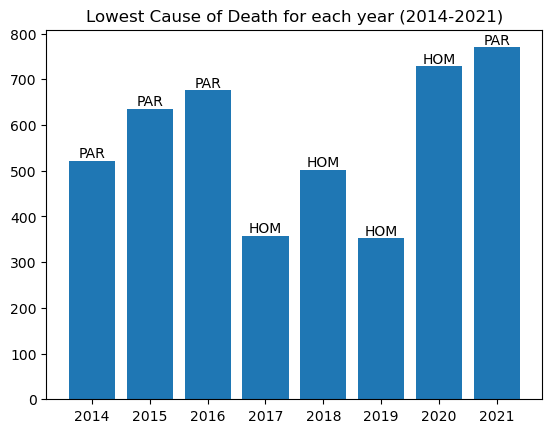

In [25]:
fig, ax = plt.subplots(1,1)
ax.bar(lowest.index, lowest[0])

rects = ax.patches
labels = ['%s' % i for i in lowest['Cause']]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label, ha='center', va='bottom')

plt.title('Lowest Cause of Death for each year (2014-2021)')
plt.show()